---
title: "Borrador - Tarea 2 - GeoEspacial"
author:
  - name: Luis E. Ascencio G. 
    orcid: 0009-0009-1694-5993
    email: luis.ascencio@cimat.mx
    affiliation: 
      - name: CIMAT
        city: Guanajuato
        state: Guanajuato
        url: https://www.cimat.mx
abstract: > 
 En este NoteBook encontraras codigo para manejar Datos Geoespaciales con R
keywords:
  - R
  - GeoEspacial 
license: "CC BY"
copyright: 
  holder: Luis E. Ascencio G.
  year: 2026
citation: 
  container-title: CIMAT
  volume: 1
  issue: 1
  doi: 000000/00000000
funding: ".."
format:
  pdf:
    documentclass: scrartcl
    toc: true
    number-sections: true
    colorlinks: true
---

In [1]:
library(sf)
library(ggplot2)
library(viridis) # Para escalas de color perceptualmente uniformes
library(knitr)
library(gstat)
library(sp)
library(stars)

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.4.0; sf_use_s2() is TRUE

Cargando paquete requerido: viridisLite

Cargando paquete requerido: abind



In [2]:
Datos <-load("tarea2/Texas.RData")

In [3]:
summary(Datos)

   Length     Class      Mode 
        2 character character 

In [4]:
Datos

[1] "P.sf"       "grid.tx.sf"

In [5]:
ls()

[1] "Datos"      "grid.tx.sf" "P.sf"

# Objeto P.sf

In [6]:
P.sf

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



Precip_in geometry                      
1  26.43     POINT Z (-386695.9 -497246....
2  36.54     POINT Z (-115844.8 -1140010...
3  12.04     POINT Z (-943104.3 -743430....
4  42.70     POINT Z (-98151.25 -593526....
5  48.20     POINT Z (75757.88 -695608 1...
6  24.53     POINT Z (-367252.3 -941365....
7  14.61     POINT Z (-671794.9 -768184....
8  10.86     POINT Z (-759227.2 -1047068...
9  25.64     POINT Z (-290894.3 -577092....
10 51.53     POINT Z (103356.6 -915812.9...
11 24.75     POINT Z (-193537.4 -1432796...
12 27.42     POINT Z (-304628 -841573.9 ...
13 14.72     POINT Z (-619071.4 -961324....
14 22.68     POINT Z (-460467.3 -685517....
15 17.77     POINT Z (-542694.9 -277463....
16 21.57     POINT Z (-534483.9 -479279....
17 20.32     POINT Z (-585623.1 -392365....
18 36.19     POINT Z (-130397.3 -791070....
19 32.41     POINT Z (-215014.5 -913653....
20 31.76     POINT Z (-150918.3 -1243834...
21 26.24     POINT Z (-310621.9 -1063927...

In [7]:
str(P.sf)

Classes ‘sf’ and 'data.frame':	21 obs. of  2 variables:
 $ Precip_in: num  26.4 36.5 12 42.7 48.2 ...
 $ geometry :sfc_POINT of length 21; first list element:  'XYZ' num  -386696 -497246 585
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA
  ..- attr(*, "names")= chr "Precip_in"


In [8]:
summary(P.sf)

   Precip_in              geometry 
 Min.   :10.86   POINT Z      :21  
 1st Qu.:20.32   epsg:NA      : 0  
 Median :25.64   +proj=eqdc...: 0  
 Mean   :27.09                     
 3rd Qu.:32.41                     
 Max.   :51.53                     

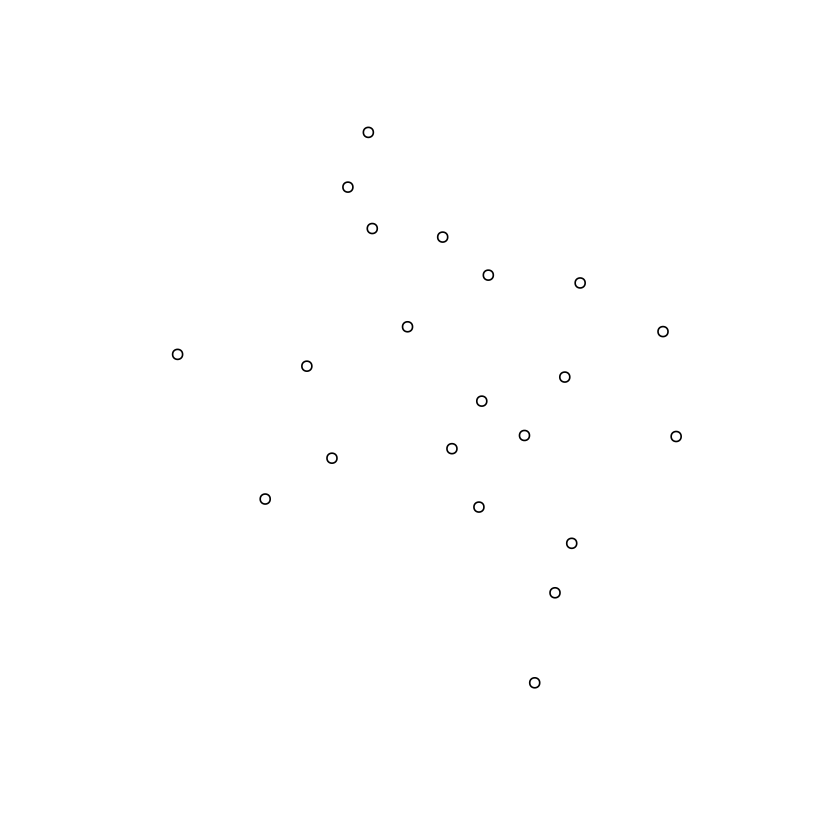

In [9]:
plot(st_geometry(P.sf))

In [10]:
kable(P.sf, "simple")



 Precip_in  geometry                       
----------  -------------------------------
     26.43  POINT Z (-386695.9 -497246.... 
     36.54  POINT Z (-115844.8 -1140010... 
     12.04  POINT Z (-943104.3 -743430.... 
     42.70  POINT Z (-98151.25 -593526.... 
     48.20  POINT Z (75757.88 -695608 1... 
     24.53  POINT Z (-367252.3 -941365.... 
     14.61  POINT Z (-671794.9 -768184.... 
     10.86  POINT Z (-759227.2 -1047068... 
     25.64  POINT Z (-290894.3 -577092.... 
     51.53  POINT Z (103356.6 -915812.9... 
     24.75  POINT Z (-193537.4 -1432796... 
     27.42  POINT Z (-304628 -841573.9 ... 
     14.72  POINT Z (-619071.4 -961324.... 
     22.68  POINT Z (-460467.3 -685517.... 
     17.77  POINT Z (-542694.9 -277463.... 
     21.57  POINT Z (-534483.9 -479279.... 
     20.32  POINT Z (-585623.1 -392365.... 
     36.19  POINT Z (-130397.3 -791070.... 
     32.41  POINT Z (-215014.5 -913653.... 
     31.76  POINT Z (-150918.3 -1243834... 
     26.24  POINT Z (-310621.9

In [11]:
st_crs(P.sf)

Coordinate Reference System:
  User input: +proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs 
  wkt:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6269]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8901]]],
    CONVERSION["unknown",
        METHOD["Equidistant Conic"],
        PARAMETER["Latitude of natural origin",39,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-96,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Latitude of 1st standard parallel",33,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel"

# Objeto grid.tx.sf

In [12]:
grid.tx.sf

vals     geometry                  
328   27.17490 POINT (-186418.6 -1435693)
333   27.19684 POINT (-173990.2 -1435693)
334   27.17490 POINT (-186418.6 -1435693)
338   27.21510 POINT (-161561.8 -1435693)
339   27.19684 POINT (-173990.2 -1435693)
343   27.22432 POINT (-149133.4 -1435693)
344   27.21510 POINT (-161561.8 -1435693)
348   27.23234 POINT (-136705 -1435693)  
349   27.22432 POINT (-149133.4 -1435693)
354   27.23234 POINT (-136705 -1435693)  
808   27.18257 POINT (-236132.2 -1423771)
813   27.18477 POINT (-223703.8 -1423771)
814   27.18257 POINT (-236132.2 -1423771)
818   27.18471 POINT (-211275.4 -1423771)
819   27.18477 POINT (-223703.8 -1423771)
823   27.18251 POINT (-198847 -1423771)  
824   27.18471 POINT (-211275.4 -1423771)
827   27.17490 POINT (-186418.6 -1435693)
828   27.18983 POINT (-186418.6 -1423771)
829   27.18251 POINT (-198847 -1423771)  
831   27.17490 POINT (-186418.6 -1435693)
832   27.19684 POINT (-173990.2 -1435693)
833   27.20368 POINT (-173990.2 -1423771)
834   27.18983 POINT (-186418.6 -1423771)
835   27.17490 POINT (-186418.6 -1435693)
836   27.19684 POINT (-173990.2 -1435693)
837   27.21510 POINT (-161561.8 -1435693)
838   27.22042 POINT (-161561.8 -1423771)
839   27.20368 POINT (-173990.2 -1423771)
840   27.19684 POINT (-173990.2 -1435693)
⋮     ⋮        ⋮                         
49680 26.76184 POINT (-571699 -267323)   
49681 26.74383 POINT (-559270.6 -267323) 
49682 26.71973 POINT (-546842.2 -267323) 
49685 26.74383 POINT (-559270.6 -267323) 
49686 26.71973 POINT (-546842.2 -267323) 
49687 26.74392 POINT (-534413.8 -267323) 
49690 26.71973 POINT (-546842.2 -267323) 
49691 26.74392 POINT (-534413.8 -267323) 
49692 26.77841 POINT (-521985.4 -267323) 
49695 26.74392 POINT (-534413.8 -267323) 
49696 26.77841 POINT (-521985.4 -267323) 
49697 26.80537 POINT (-509557 -267323)   
49700 26.77841 POINT (-521985.4 -267323) 
49701 26.80537 POINT (-509557 -267323)   
49702 26.82739 POINT (-497128.6 -267323) 
49705 26.80537 POINT (-509557 -267323)   
49706 26.82739 POINT (-497128.6 -267323) 
49707 26.85508 POINT (-484700.2 -267323) 
49710 26.82739 POINT (-497128.6 -267323) 
49711 26.85508 POINT (-484700.2 -267323) 
49712 26.87134 POINT (-472271.8 -267323) 
49715 26.85508 POINT (-484700.2 -267323) 
49716 26.87134 POINT (-472271.8 -267323) 
49717 26.88645 POINT (-459843.4 -267323) 
49720 26.87134 POINT (-472271.8 -267323) 
49721 26.88645 POINT (-459843.4 -267323) 
49722 26.90070 POINT (-447415 -267323)   
49725 26.88645 POINT (-459843.4 -267323) 
49726 26.90070 POINT (-447415 -267323)   
49730 26.90070 POINT (-447415 -267323)

In [13]:
str(grid.tx.sf)

Classes ‘sf’ and 'data.frame':	23180 obs. of  2 variables:
 $ vals    : num  27.2 27.2 27.2 27.2 27.2 ...
 $ geometry:sfc_POINT of length 23180; first list element:  'XY' num  -186419 -1435693
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA
  ..- attr(*, "names")= chr "vals"


In [14]:
summary(grid.tx.sf)

      vals                geometry    
 Min.   :26.23   POINT        :23180  
 1st Qu.:26.83   epsg:NA      :    0  
 Median :27.17   +proj=eqdc...:    0  
 Mean   :27.16                        
 3rd Qu.:27.50                        
 Max.   :28.23                        

In [15]:
#kable(grid.tx.sf, "simple")

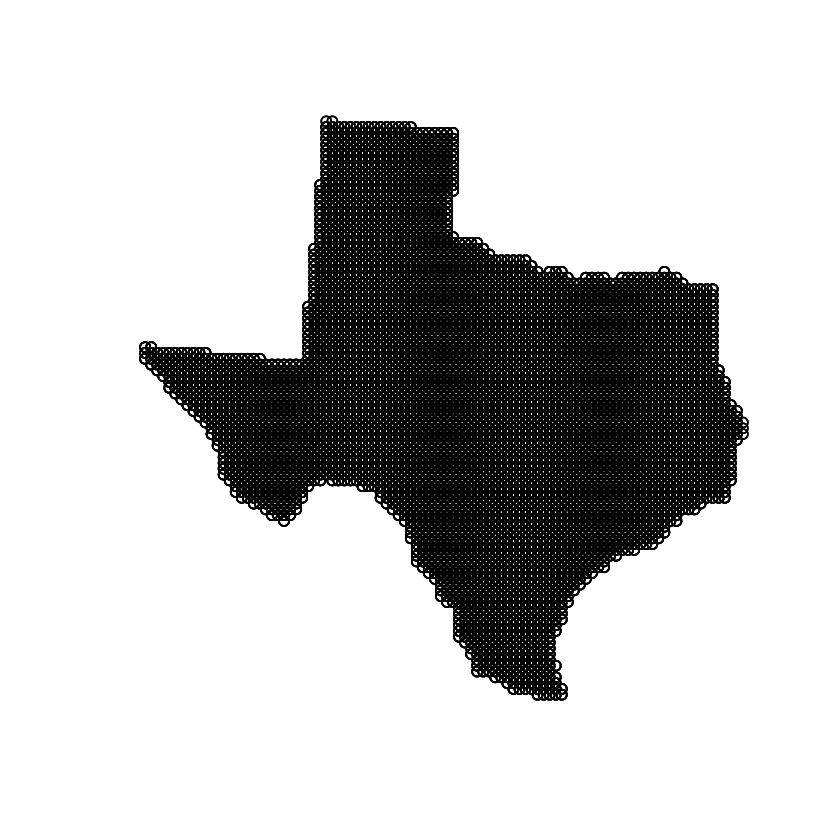

In [16]:
plot(st_geometry(grid.tx.sf))

In [17]:
st_crs(grid.tx.sf)

Coordinate Reference System:
  User input: +proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs 
  wkt:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6269]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8901]]],
    CONVERSION["unknown",
        METHOD["Equidistant Conic"],
        PARAMETER["Latitude of natural origin",39,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-96,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Latitude of 1st standard parallel",33,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel"

# Graficamops todo junto

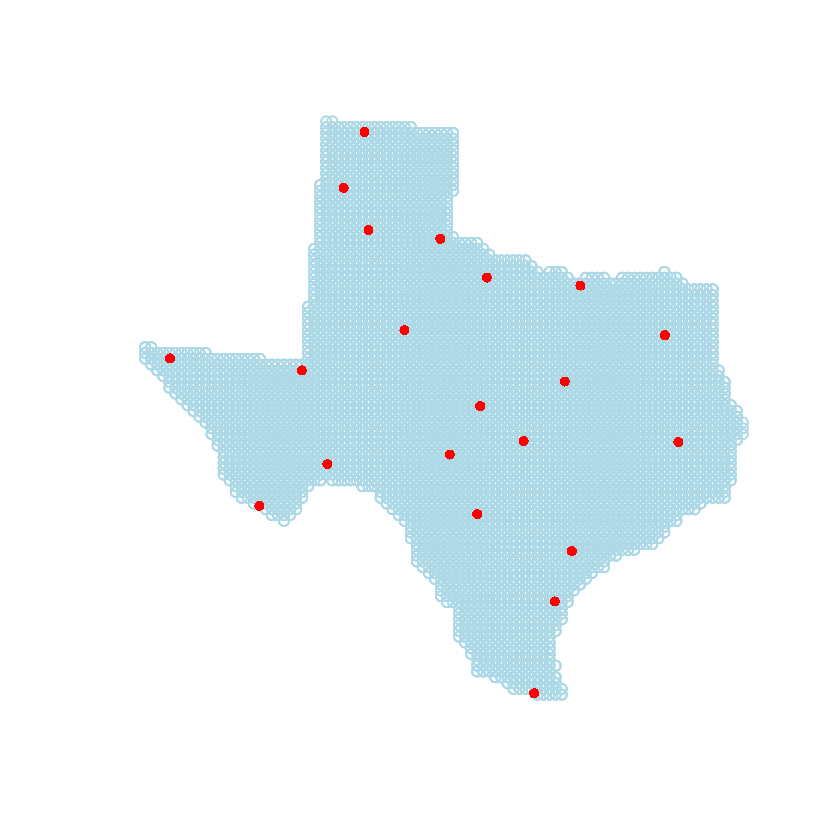

In [18]:
plot(st_geometry(grid.tx.sf), col = "lightblue")
plot(P.sf, col = "red", pch = 16, add = TRUE)


## Con GGplot

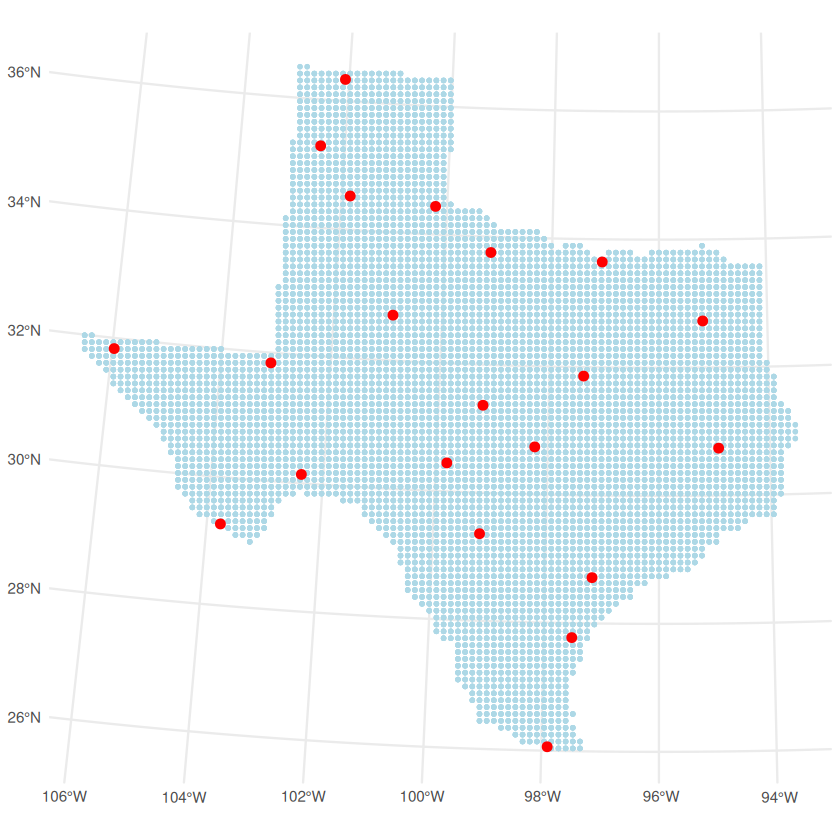

In [49]:
ggplot() +
  geom_sf(data = grid.tx.sf, fill = "lightblue", color = "lightblue",size = 0.5) +
  geom_sf(data = P.sf, color = "red", size = 2) +
  theme_minimal()

In [20]:
colnames(grid.tx.sf)

[1] "vals"     "geometry"

In [21]:
colnames(P.sf)

[1] "Precip_in" "geometry"

In [22]:
P_data <- st_drop_geometry(P.sf)
head(P_data)

Precip_in
1 26.43    
2 36.54    
3 12.04    
4 42.70    
5 48.20    
6 24.53

In [23]:
grid_data <- st_drop_geometry(grid.tx.sf)
head(grid_data)

vals    
328 27.17490
333 27.19684
334 27.17490
338 27.21510
339 27.19684
343 27.22432

Trasformamos a formato sp

In [24]:
P.sp   <- as(P.sf, "Spatial")
grid.sp <- as(grid.tx.sf, "Spatial")

In [25]:
names(P.sp)

[1] "Precip_in"

In [26]:
names(grid.sp)

[1] "vals"

# Modelo IDW

In [27]:
idw.model.p2 <- gstat(formula = Precip_in ~ 1,
                   data = P.sp,
                   nmax = 7,
                   set = list(idp = 2))   # potencia p = 2

idw.pred.p2 <- predict(idw.model.p2, grid.sp)

[inverse distance weighted interpolation]


In [28]:
idw.sf.p2 <- st_as_sf(idw.pred.p2)

Grafica 

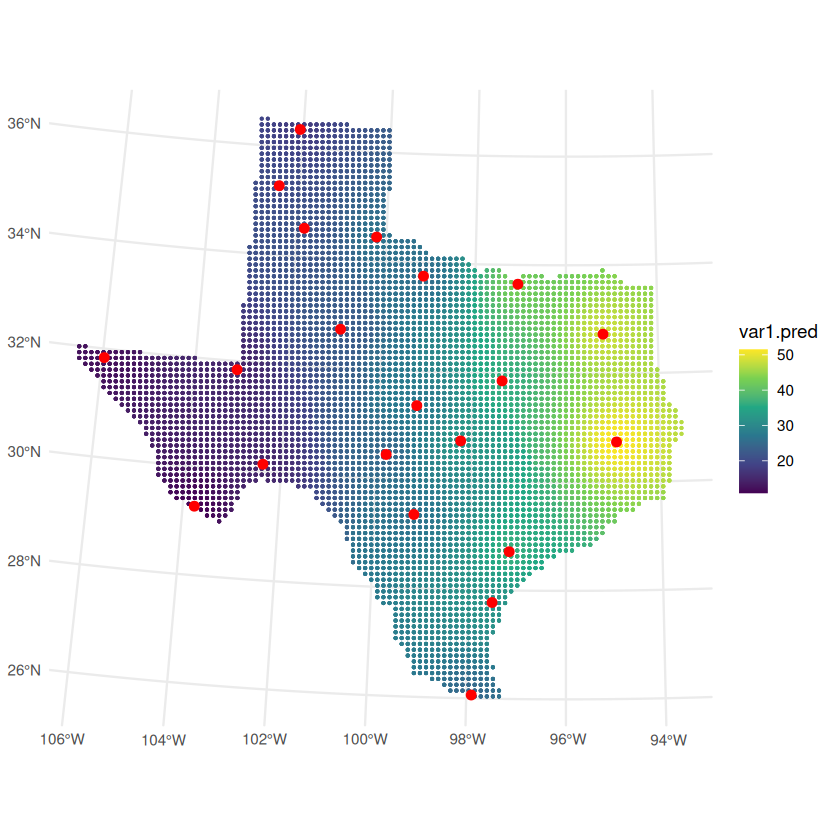

In [29]:
ggplot() +
  geom_sf(data = idw.sf.p2, 
          aes(color = var1.pred), 
          size = 0.1) +  
  geom_sf(data = P.sf, 
          color = "red", 
          size = 2) +
  scale_color_viridis_c() +
  theme_minimal()

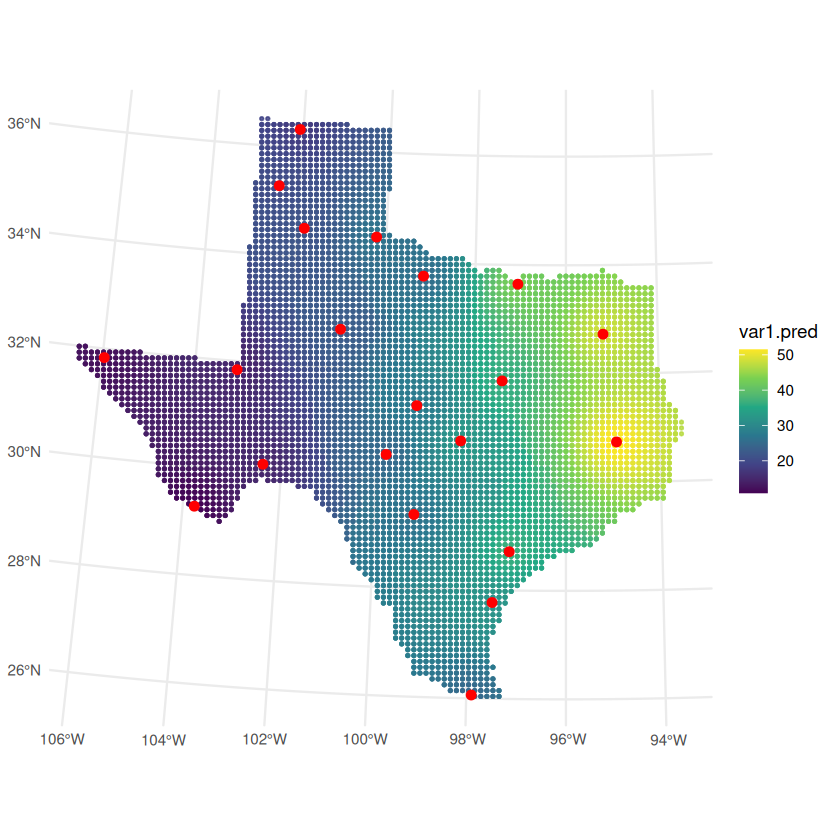

In [30]:
ggplot() +
  geom_sf(data = idw.sf.p2, 
          aes(color = var1.pred), 
          size = 0.4,
          alpha = 0.6) +
  geom_sf(data = P.sf, 
          color = "red", 
          size = 2) +
  scale_color_viridis_c() +
  theme_minimal()


# Sub muestra 

In [31]:
set.seed(123)

idw.sample.p2 <- idw.sf.p2[sample(nrow(idw.sf.p2), 10000), ]

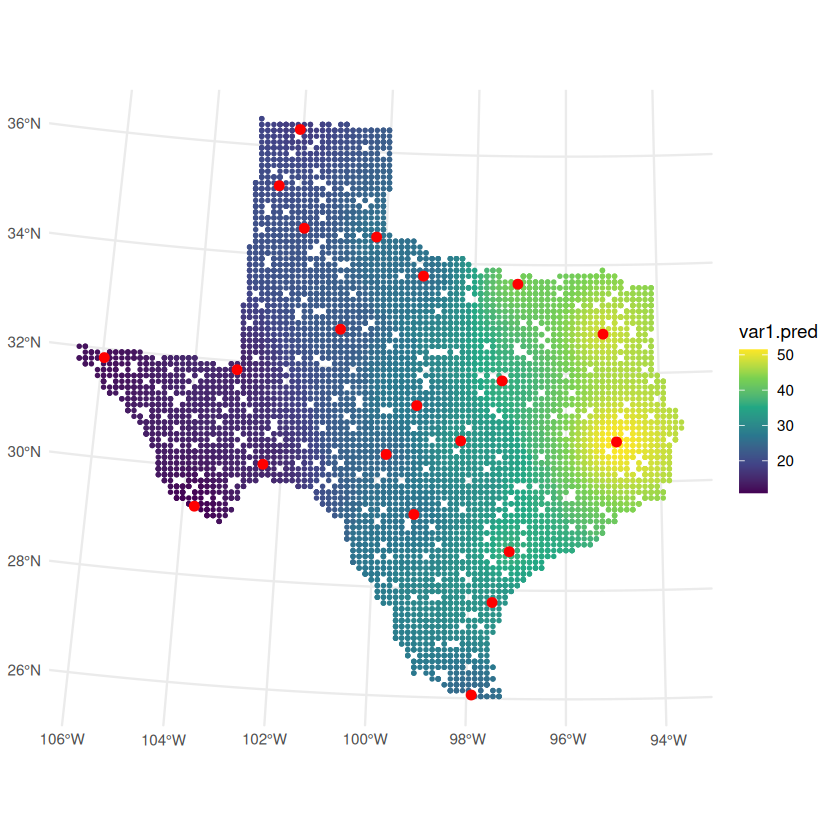

In [32]:
ggplot() +
  geom_sf(data = idw.sample.p2,
          aes(color = var1.pred),
          size = 0.5) +
  geom_sf(data = P.sf,
          color = "red",
          size = 2) +
  scale_color_viridis_c() +
  theme_minimal()

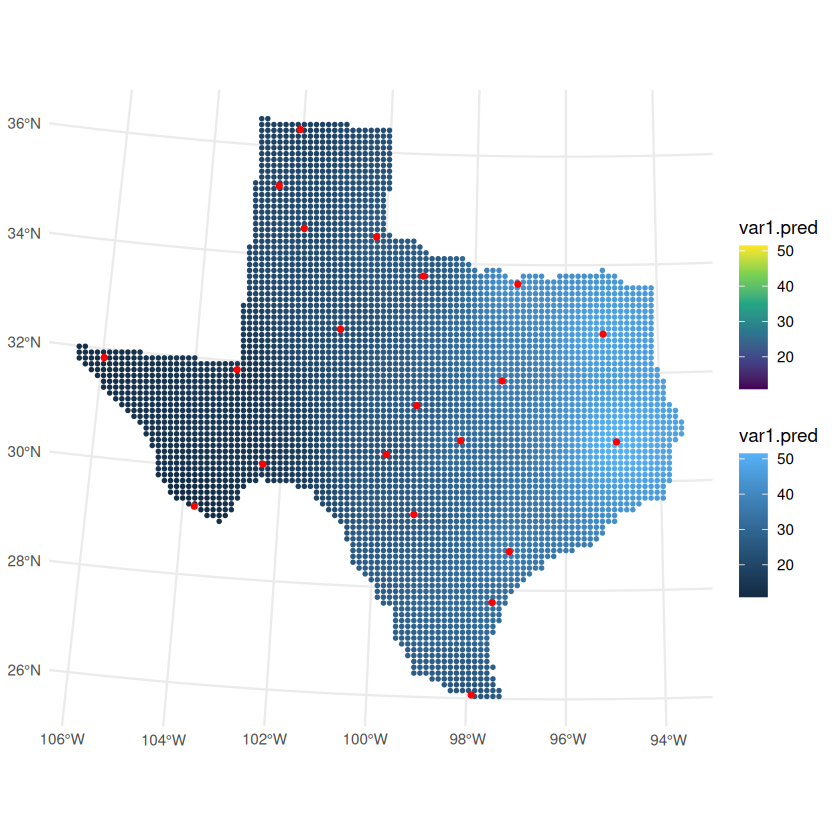

In [33]:
idw.stars.p2 <- st_as_stars(idw.sf.p2)

ggplot() +
  geom_stars(data = idw.stars.p2, aes(color = var1.pred),size = 0.5) +
  geom_sf(data = P.sf, color = "red", size = 1) +
  scale_fill_viridis_c() +
  theme_minimal()

# Modelo kryge Ordinario

## Variograma empirico

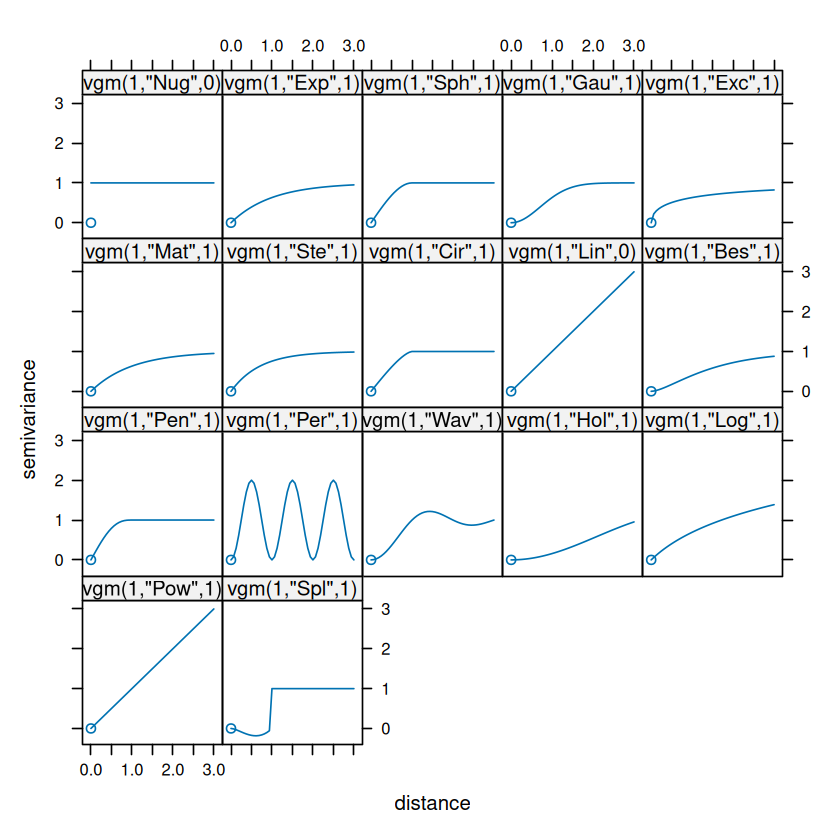

In [50]:
show.vgms()

In [34]:
vg <- variogram(Precip_in ~ 1, data = P.sp)

Warning message in fit.variogram(vg, model = vgm("Sph")):
“No convergence after 200 iterations: try different initial values?”
Warning message in fit.variogram(object, model, fit.sills = fit.sills, fit.ranges = fit.ranges, :
“No convergence after 200 iterations: try different initial values?”


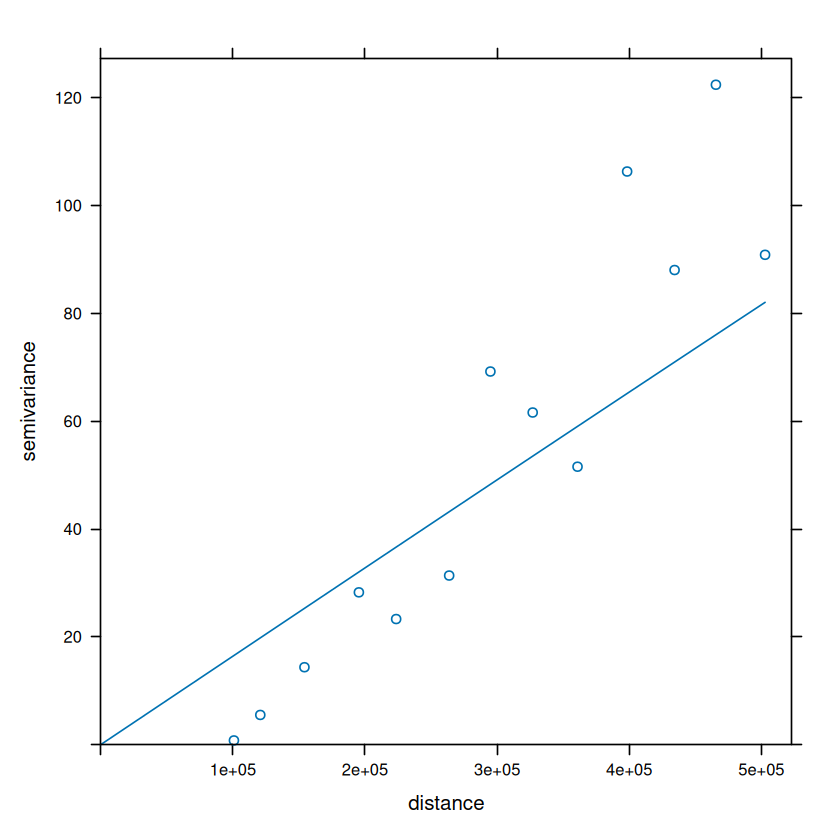

In [53]:
vg.fit.Sph <- fit.variogram(vg, model = vgm("Sph"))
plot(vg, vg.fit.Sph)

# Kryging

In [36]:
krig.pred.Sph <- krige(Precip_in ~ 1,
                   P.sp,
                   grid.sp,
                   model = vg.fit.Sph)

krig.sf.Sph <- st_as_sf(krig.pred.Sph)

[using ordinary kriging]


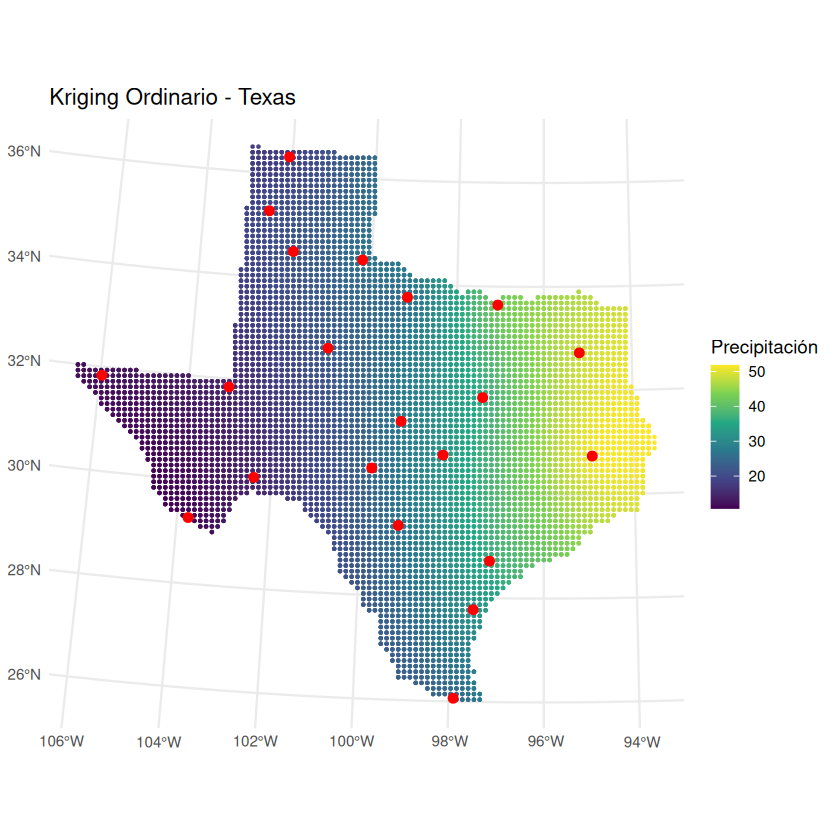

In [37]:
ggplot() +
  geom_sf(data = krig.sf.Sph,
          aes(color = var1.pred),
          size = 0.2,      
          alpha = 0.7) +  
  geom_sf(data = P.sf,
          color = "red",
          size = 2) +
  scale_color_viridis_c() +
  theme_minimal() +
  labs(color = "Precipitación",
       title = "Kriging Ordinario - Texas")


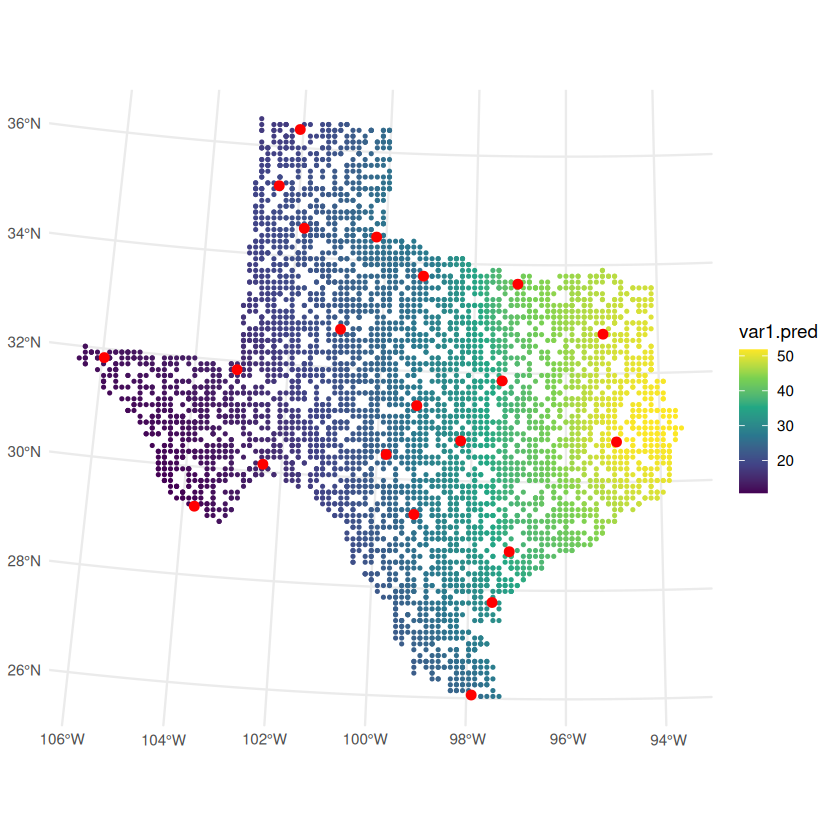

In [38]:
set.seed(123)
krig.sample.Sph <- krig.sf.Sph[sample(nrow(krig.sf.Sph), 5000), ]

ggplot() +
  geom_sf(data = krig.sample.Sph,
          aes(color = var1.pred),
          size = 0.4) +
  geom_sf(data = P.sf,
          color = "red",
          size = 2) +
  scale_color_viridis_c() +
  theme_minimal()

# Validacion Cruzada

# K-folds

In [39]:
set.seed(123)

k <- 5
folds <- sample(rep(1:k, length.out = nrow(P.sp)))

In [40]:
cv_model <- function(model_type = "idw") {
  
  errors <- c()
  
  for (i in 1:k) {
    
    train <- P.sp[folds != i, ]
    test  <- P.sp[folds == i, ]
    
    if (model_type == "idw") {
      
      model <- gstat(formula = Precip_in ~ 1,
                     data = train,
                     nmax = 7,
                     set = list(idp = 2))
      
      pred <- predict(model, test)
      
    } else if (model_type == "kriging") {
      
      vg <- variogram(Precip_in ~ 1, train)
      vg.fit <- fit.variogram(vg, vgm("Sph"))
      
      pred <- krige(Precip_in ~ 1,
                    train,
                    test,
                    model = vg.fit)
    }
    
    errors <- c(errors, test$Precip_in - pred$var1.pred)
  }
  
  return(errors)
}

In [41]:
idw_errors  <- cv_model("idw")
krig_errors <- cv_model("kriging")

[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]


Warning message in fit.variogram(vg, vgm("Sph")):
“No convergence after 200 iterations: try different initial values?”


[using ordinary kriging]


Warning message in fit.variogram(object, model, fit.sills = fit.sills, fit.ranges = fit.ranges, :
“No convergence after 200 iterations: try different initial values?”


[using ordinary kriging]


Warning message in fit.variogram(vg, vgm("Sph")):
“No convergence after 200 iterations: try different initial values?”


[using ordinary kriging]


Warning message in fit.variogram(object, model, fit.sills = fit.sills, fit.ranges = fit.ranges, :
“No convergence after 200 iterations: try different initial values?”


[using ordinary kriging]


Warning message in fit.variogram(vg, vgm("Sph")):
“No convergence after 200 iterations: try different initial values?”
Warning message in fit.variogram(object, model, fit.sills = fit.sills, fit.ranges = fit.ranges, :
“No convergence after 200 iterations: try different initial values?”


[using ordinary kriging]


In [42]:
rmse <- function(e) sqrt(mean(e^2))
mae  <- function(e) mean(abs(e))
bias <- function(e) mean(e)

results_kfold <- data.frame(
  Model = c("IDW", "Kriging"),
  RMSE  = c(rmse(idw_errors), rmse(krig_errors)),
  MAE   = c(mae(idw_errors), mae(krig_errors)),
  Bias  = c(bias(idw_errors), bias(krig_errors))
)

results_kfold

Model   RMSE     MAE      Bias      
1 IDW     5.129461 4.035553 -0.1015889
2 Kriging 3.367922 2.347601 -0.2789704

# LEAVE-ONE-OUT (LOOCV)

In [43]:
idw_cv <- krige.cv(Precip_in ~ 1,
                   P.sp,
                   nmax = 7,
                   set = list(idp = 2))

In [45]:
krig_cv <- krige.cv(Precip_in ~ 1,
                    P.sp,
                    model = vg.fit.Sph)

In [46]:
results_loocv <- data.frame(
  Model = c("IDW", "Kriging"),
  RMSE  = c(
    sqrt(mean(idw_cv$residual^2)),
    sqrt(mean(krig_cv$residual^2))
  ),
  MAE   = c(
    mean(abs(idw_cv$residual)),
    mean(abs(krig_cv$residual))
  ),
  Bias  = c(
    mean(idw_cv$residual),
    mean(krig_cv$residual)
  )
)

results_loocv

Model   RMSE     MAE      Bias       
1 IDW     5.110136 3.942541 -0.04758768
2 Kriging 3.113423 2.169313 -0.03543315